In order to successfully complete this assignment you must:
1. Do the required reading, watch the provided videos and complete all instructions in this notebook.
2. The assignment must be submitted to the exercises folder in the `cmse802-yourlastname` repository on or before **10:00 am the day before the class**.  Late assignment will receive <=80% of the grade.

Students must come to class the next day prepared to discuss the material covered in this assignment. 

### <p style="text-align: right;"> &#9989; Put your name here: Pavan Yachamaneni </p>

---
<h1 style="font-size:3em"><b>Regular expression and web scarping</b></h1>

# Learning objectives

At the end of the exercise, you should be able to:
- Explain what web scraping is.
- Use regex101 to practice using regular expression.
- Put together simple regular expression to get infomation out of text documents

# Outline

1. [Web scraping](#Web_Scraping)
1. [Regular expressions](#Regular_Expressions)
1. [Python `re` module](#re)
1. [Parsing webpage with `re`](#webpage)
1. [OPTIONAL: practice questions](#practice)
1. [Assignment wrap-up](#Assignment_wrap-up)


# Install programs needed for class

&#9989; <font color=blue>**DO THIS:**</font> Run the following code block to import modules needed for in-class exercise. If any module leads to a `ModuleNotFound` error, install it with:

```bash
pip install modulename
```

In [2]:
from html.parser import HTMLParser  
from urllib import parse
from urllib.request import urlopen  
from urllib.request import urlretrieve
from ipywidgets import FloatProgress
from IPython.display import display
from glob import glob
import matplotlib, autopep8, pydocstyle, bs4, pandas

&#9989; <font color=blue>**DO THIS:**</font> In your terminal, install `pdoc3`, `pylint`, and `pydocstyle` and test it with the following command lines:

```bash
pip install pdoc3
pip install pylint
pip install pydocstyle
pdoc3
pylint
pydocstyle
```

---
<a name="Web_Scraping"></a>
# 1. Define web scraping

The internet has a wealth of data and some are highly relevant to your research. Web scraping is a common technique to download and use data on the internet. Webscraping can easy or challenging, depend on how the information is presented on the web:

- (easy) Simple HTML
- (harder) HTML and CSS
- (difficult) Javascript - Often requires a "Headless" web browser.

&#9989; <font color=blue>**DO THIS:**</font> If you are new to HTML or need a refersher, read the following article in detail. If you are familar with HTML, a quick skim of the article may be sufficient:

- https://www.dataquest.io/blog/web-scraping-tutorial-python/

---
<a name="Regular_Expressions"></a>
# 2. Regular expression

## 2.1 Video tutorial

The following video is about regular expressions which is a bit long. Suggeset that you either skim or skip the 1st 9-10 minutes and speed up the video a bit.  

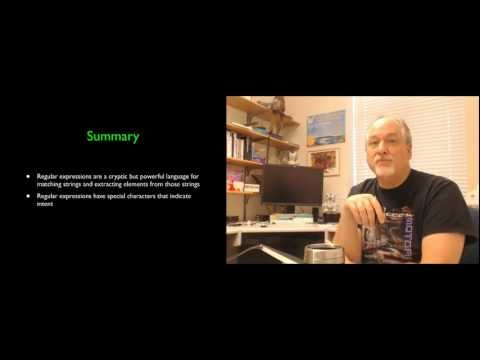

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo("UR6a_wZ8ido",width=640,height=360, cc_load_policy=True)

## 2.2 Regular expression resources

There are a lot of resources on regular expressions.  Here are a few to check out:

* https://docs.python.org/3/howto/regex.html
* http://www.pyregex.com/
* http://www.bogotobogo.com/python/python_regularExpressions.php
* http://howardabrams.com/regexp/

---
<a name="re"></a>
# 3. Python `re` module

For webscaping, or generally for parsing infomation out of text documents, __regular expressions__ (also referred to as **regex** or **regexp**) is frequently used. It can be thought of as a powerful  language for pattern matching in text. In the following sections, we will practice using regular expression with the `re` module.

## 3.1 The `search` function

The python module **re** provides support for regular expressions. A typical regular expression search in python looks like

```python
match = re.search(pattern, text)
```

Where:
1. **pattern**: is a string with the instructions of what to look for and how to look for it
1. **text**: is a string on which the pattern matching will be performed 

&#9989; <font color=blue>**DO THIS:**</font> Run the following code:

In [4]:
import re

text  = 'Go green, go white!'

match = re.search('green', text )

print(type(match))

print(match)

<class 're.Match'>
<re.Match object; span=(3, 8), match='green'>


&#9989; <font color=blue>**DO THIS:**</font> Run the following code:In the following code block, use the `search` function to search for 'MSU' in `text` and print out the search result.

In [5]:
# put your codes here
match1= re.search('MSU', text)
print(match1)

None


## 3.2 Flexibility of regular expression

The power of regular expressions comes from the fact that three types of patterns can be represented in the expression:

- **Regular characters**: e.g., 'g' and 'M'
- **Metacharacters**: character with special meaning, examples:
  - `[a-m]` (any char a~m)
  - `[^ab]` (not matching a or b)
  - `x|y` (match either x or y)
  - `\` (special sequence, see below))
  - `.` (any character)
  - `^` (start of the line)
  - `$` (match at the end of the line)
  - `*` (>0 occurrence(s))
  - `+` (>1 occurences)
  - `?` (<=1 occurence)
  - `{2}` (exactly 2 occurences). 
  - `()` (capturing group) 
- **Special sequences**: examples,
  - `\d` (any digit)
  - `\s` (white space)
  - `\w` (alphanumeric)
  - `\W` (non-alphanumeric)

A good list of regex characters and other expressions can be found here:
- https://www.shortcutfoo.com/app/dojos/python-regex/cheatsheet

&#9989; <font color=red>**QUESTION:**</font> Before running the next code block, what do you think will be printed out?

<font size=+3>&#9998;</font> If block will run because \w* mean alphaumeric characters with one or more  in the target string

In [69]:
text = 'an example word-cat!!'

match = re.search('word-\w{1}', text)

# If-statement after search() tests if it succeeded
if match:                      
    print('found', match.group()) ## 'found word:cat'
else:
    print('did not find')

found word-c


&#9989; <font color=blue>**DO THIS:**</font>  Go to the [regex101](https://regex101.com/) website, replace the `*` by another expression so that the result includes just one alphanumeric character after the dash (i.e., it should find `word-c`). In the code block below, include both non-working and working regular expression you have tried.

In [7]:
# put your codes here
text = 'an example word-cat!!'
match = re.search('word-\w?', text)

# If-statement after search() tests if it succeeded
if match:                      
    print('found', match.group()) ## 'found word:cat'
else:
    print('did not find')

found word-c


## 3.3 The `findall` function

To find all texts that match the regular expresson, you can use the `findall` function. The syntax is:

```python
matches = re.findall(pattern, text)
```

&#9989; <font color=blue>**DO THIS:**</font> Run the code block below where an `emails` string is defined.

In [8]:
emails = 'deep.purple@msu.edu, alice-b@google.com,monkey@msu.edu, sparty@msu.edu'

&#9989; <font color=blue>**DO THIS:**</font>  Use the [regex101](https://regex101.com/) tool to experiment with regular expressions that find all occurences of a pattern that starts with `@` and ends before `.`. In the code block below, include both non-working and working regular expression you have tried.

In [9]:
#put your code here
match = re.findall('@\w*.',emails)

if match:                      
    print('found', match) 
else:
    print('did not find')


found ['@msu.', '@google.', '@msu.', '@msu.']


&#9989; <font color=blue>**DO THIS:**</font>  In the code block below, use the working regular expression from the answer above to find the intended strings in `emails` with the `findall` function and print out all matches. 

In [71]:
# put your codes here
found = []
dummy = re.findall('\w*.' or match ,emails)
print(dummy)
#for i in range(len(match)):
 #   dummy = re.findall('.' and match[i],emails)
  #  print(dummy)

['deep.', 'purple@', 'msu.', 'edu,', ' ', 'alice-', 'b@', 'google.', 'com,', 'monkey@', 'msu.', 'edu,', ' ', 'sparty@', 'msu.', 'edu']


## 3.4 Compiling regular expression

Since the search pattern in a regular expression is essentially a set of instructions (i.e., a program), you can compile it and reuse it:

```python
compiled_pattern = re.compile(pattern)
compiled_pattern.findall(text)
```

&#9989; <font color=red>**QUESTION:**</font> What does the following pattern specify? If it is applied to the `emails` string, what will the output be?

```python
compiled_pattern = re.compile('@[\w\d.]+\.+(com|org|edu)')
```

In [28]:
compiled_pattern = re.compile('@[\w\d.]+\.+(com|org|edu)')
compiled_pattern.findall(emails)

['edu', 'com', 'edu', 'edu']

<font size=+3>&#9998;</font> The above code 

&#9989; <font color=blue>**DO THIS:**</font>  Write codes that use the `emails` object and find all occurrence of the `compiled_pattern` specified above.

In [ ]:
# put your codes here


----
<a name="webpage"></a>
# 4. Parsing webpage with regular expression

Here is an example using `re` to get information out of webpages.

&#9989; <font color=blue>**DO THIS:**</font>  Take a look at the following code block and comments on what each line does.

In [39]:
import re
import requests

url = "https://colbrydi.github.io/pages/contact.html"

source_code = requests.get(url)

plain_text = source_code.text

regex = re.compile("\(?\d{3}\)?\s?\d{3}?[-]\d{4}?")
# \(?: 1 starting parenthesis for one time
# \d{3})?: followed by 3 digits and closing parenthesis for one time
# \s?: space for one time
#\d{3}?: 3 digits for one time
# [-]\d{3}? - followed by 3 digits for 1 time
# ultimately printing the mobile number on the web page
res = regex.findall(plain_text)

print(res)

['(517) 432-0455']


&#9989; <font color=blue>**DO THIS:**</font>  Use the `type()` function and figure out the types of objects are returned when:

- The `get` function of the `request` module is called?
- The `text` attribute of the`source_code` object?

In [40]:
# put your codes here
print(type(source_code))
print(type(plain_text))

<class 'requests.models.Response'>
<class 'str'>


# 5. [OPTIONAL] Practice questions

The following one Do-this and three questions are __optional__.

&#9989; <font color=blue>**OPTIONAL - DO THIS:**</font>  Use the [regex101](https://regex101.com/) tool to experiment with regular expressions and answer the following questions. In your answers, include both non-working and working regular expression you have tried.

&#9989; <font color=red>**OPTIONAL - QUESTION:**</font> Write a regular expression to find valid **email addresses** in the `email_string` below. 

In [44]:
# put your codes here
email_string = "dirk@colbry.com, colbrydi@msu.edu, dirkcolbry+junk@gmail.com"

match1 = re.compile('\w*[@]\w*[.]\w*')

match1_1 = match1.findall(email_string)

print(match1_1)

['dirk@colbry.com', 'colbrydi@msu.edu', 'junk@gmail.com']


&#9989; <font color=red>**OPTIONAL - QUESTION:**</font> Write a regular expression to find valid **hashtag** in the `hashtag_string` below. See [here](https://www.hashtags.org/featured/what-characters-can-a-hashtag-include/) for a definition of valid hashtag string.

In [ ]:
# put your codes here
hashtag_string = "#Election2016, #Regexpressions_AreAwsome, #whatisahashtag "


&#9989; <font color=red>**OPTIONAL - QUESTION:**</font> Write a more general regular expression to find valid phone numbers in the `phone_string` below.

In [67]:
# put your codes here
phone_string = "(517) 432-0455, 432-0455, 518-432-0455, not a phone number, 1-519-432-0455, 365-33-4008"
match3 = re.compile('\(?\d{3}\)?[-]?\d{3}?[-]\d{4}?')
match3_1 = re.compile('\(?\d{3}\)?\s?\d{3}?[-]\d{4}?')
match3_3 = match3.findall(phone_string)

print(match3_3)

 

['518-432-0455', '519-432-0455']


In [68]:
print(match3_1.findall(phone_string))



['(517) 432-0455']

----
<a name="Assignment_wrap-up"></a>
# 5. Assignment wrap-up

Please fill out the [pre-class survey](https://docs.google.com/forms/d/e/1FAIpQLSfhEjAujkrA3E5h739qRzj9buceC2PhbCrSnc6ecHZoDydroQ/viewform) to receive credit for this assignment.


---------
### Congratulations, we're done!

To get credit for this assignment you must fill out and submit this notebook file before the assignment due date.

---
<a name="practice"></a>
      
# Appendix




&#169; Copyright 2021,  Michigan State University Board of Trustees